In [1]:
# Student Performace Indicator

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
print("Categorical Features: Unique value for Gender, Nationality, Place of Birth, StageID, GradeID, SectionID, Topic, Semester, Relation, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays")
# df.head(5)
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())



Categorical Features: Unique value for Gender, Nationality, Place of Birth, StageID, GradeID, SectionID, Topic, Semester, Relation, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays
['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [17]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features: {}, Count {}".format(numerical_features,len(numerical_features)))
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features: {}, count {}".format(categorical_features, len(categorical_features   )))

Numerical Features: ['math_score', 'reading_score', 'writing_score'], Count 3
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], count 5


In [30]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3
df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [ ]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()
print("Number of students with full score in reading: {}".format(reading_full))
print("Number of students with full score in writing: {}".format(writing_full)) 
print("Number of students with full score in math: {}".format(math_full))

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [59]:
reading_less = df[df['reading_score'] <= 20]['avg_score'].count()
writing_less = df[df['writing_score'] <= 20]['avg_score'].count()
math_less = df[df['math_score'] <= 20]['avg_score'].count()
print("Number of students with score less than or equal to 100 in reading: {}".format(reading_less))
print("Number of students with score less than or equal to 100 in writing: {}".format(writing_less)) 
print("Number of students with score less than or equal to 100 in math: {}".format(math_less))

Number of students with score less than or equal to 100 in reading: 1
Number of students with score less than or equal to 100 in writing: 3
Number of students with score less than or equal to 100 in math: 4


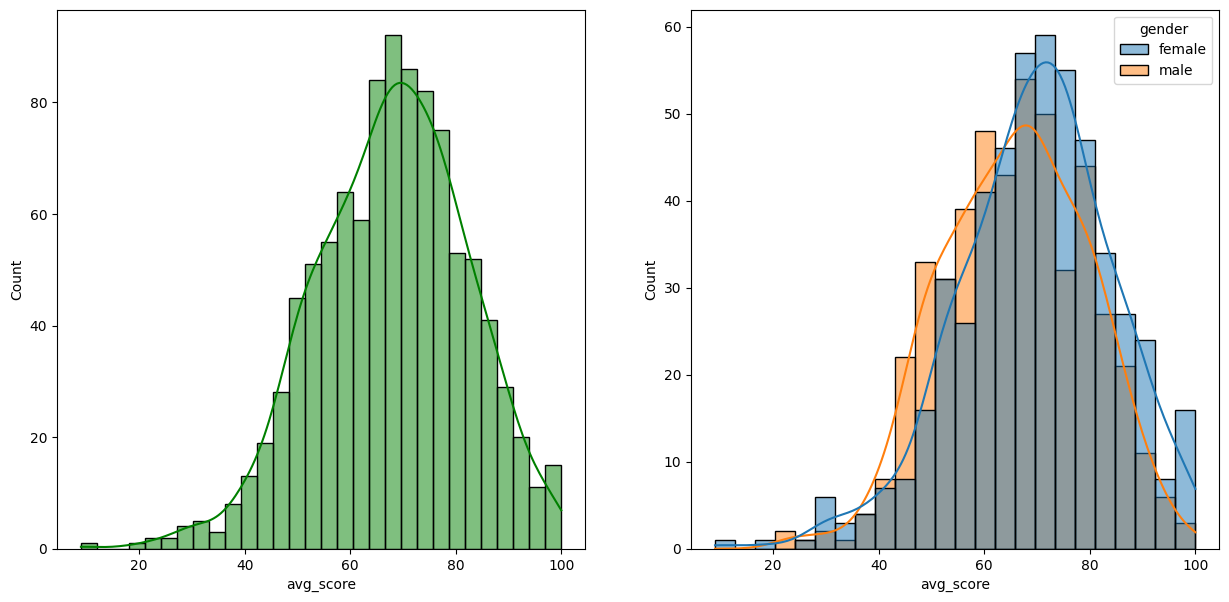

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='avg_score', kde=True, hue='gender', ax=axs[1])
plt.show()

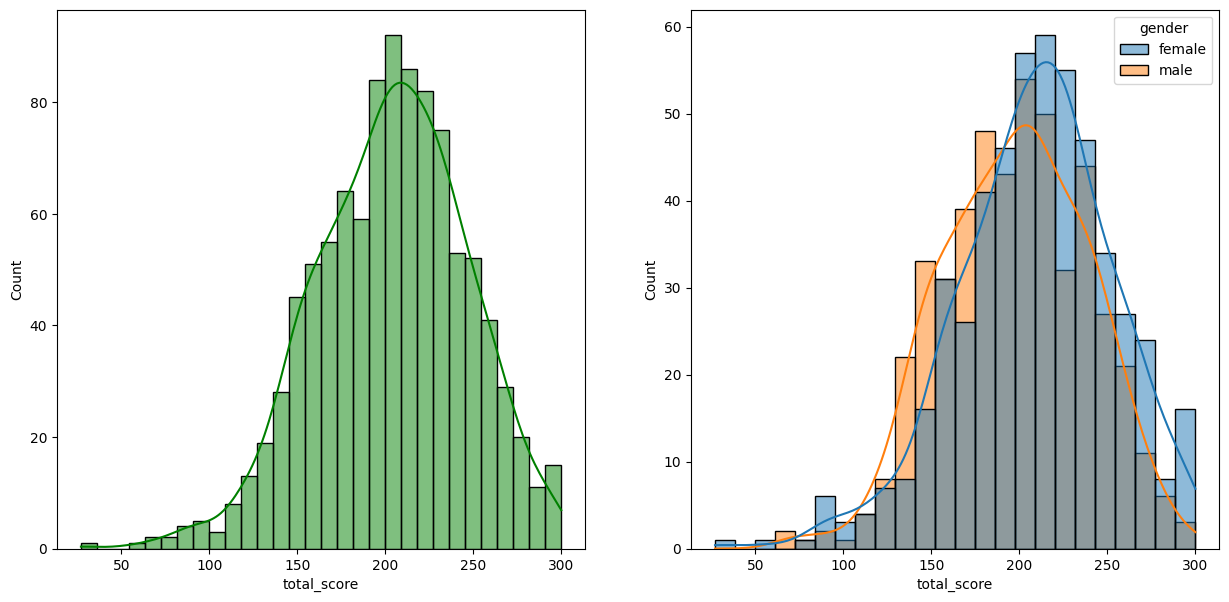

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='total_score', kde=True, hue='gender',ax=axs[1])
plt.show()